In [1]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
#Read excel file from the current working directory
CD = pd.read_excel('EP - Change 2022 Creative Data writeback_091122.xlsx')

In [3]:
#View DataFrame
CD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102068 entries, 0 to 102067
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Requested URL Path       14205 non-null   object        
 1   Campaign                 101996 non-null  object        
 2   Ad Format                101997 non-null  object        
 3   Clicks                   90191 non-null   float64       
 4   Spend                    102068 non-null  object        
 5   Creative - Size          73485 non-null   object        
 6   Date                     102068 non-null  datetime64[ns]
 7   Impressions              102068 non-null  float64       
 8   Reach                    80824 non-null   float64       
 9   Audience                 102027 non-null  object        
 10  Platform                 102068 non-null  object        
 11  Creative - Family        101185 non-null  object        
 12  Creative - Versi

In [4]:
#View output
print(CD)

                                       Requested URL Path      Campaign  \
0       https://graph.facebook.com/v12.0/act_109970164...          FY22   
1       https://graph.facebook.com/v12.0/act_109970164...          FY22   
2       https://graph.facebook.com/v12.0/act_109970164...          FY22   
3       https://graph.facebook.com/v12.0/act_109970164...          FY22   
4       https://graph.facebook.com/v12.0/act_109970164...          FY22   
...                                                   ...           ...   
102063                                                NaN          ESPN   
102064                                                NaN           MTV   
102065                                                NaN  Food Network   
102066                                                NaN    Nat Geo TV   
102067                                                NaN         Pluto   

           Ad Format  Clicks Spend Creative - Size       Date  Impressions  \
0       Single image 

In [5]:
#View the first five rows
CD.head(5)

,Requested URL Path,Campaign,Ad Format,Clicks,Spend,Creative - Size,Date,Impressions,Reach,Audience,...,Creative - Family,Creative - Version,100% Video Views,Video Starts,Follows,Days away from max date,Latest report?,CTR,CTR Score,Weighted CTR Score
0,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.26,NaN,2022-05-19,119.0,63.0,1,...,CloseFaster,NoDTI,NaN,NaN,NaN,165.0,0,0.000000,NaN,NaN
1,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.15,NaN,2022-05-19,9.0,8.0,1,...,CloseFaster,NoDTI,NaN,NaN,NaN,165.0,0,0.000000,NaN,NaN
2,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.38,NaN,2022-05-19,26.0,17.0,1,...,CloseFaster,NoDTI,NaN,NaN,NaN,165.0,0,0.000000,NaN,NaN
3,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.19,NaN,2022-05-19,12.0,10.0,1,...,CloseFaster,NoDTI,NaN,NaN,NaN,165.0,0,0.000000,NaN,NaN
4,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,1.0,3.62,NaN,2022-05-19,247.0,150.0,1,...,CloserTwins,EarlyBird,NaN,NaN,NaN,165.0,0,0.004049,NaN,NaN


In [6]:
#Determine if there are any null values
CD.isnull().sum()

Requested URL Path         87863
Campaign                      72
Ad Format                     71
Clicks                     11877
Spend                          0
Creative - Size            28583
Date                           0
Impressions                    0
Reach                      21244
Audience                      41
Platform                       0
Creative - Family            883
Creative - Version           525
100% Video Views           77621
Video Starts               76608
Follows                    93668
Days away from max date        0
Latest report?                 0
CTR                        12829
CTR Score                  27050
Weighted CTR Score         27050
dtype: int64

In [7]:
#Creating new dataframe with no missing values 
CD_new = CD.dropna(subset = ['Campaign', 'Clicks','Creative - Size', 'Reach', '100% Video Views'])

In [8]:
#View new dataframe
print(CD_new)

      Requested URL Path                              Campaign Ad Format  \
503                  NaN      1 - StackAdapt - Display - Video     Video   
505                  NaN      1 - StackAdapt - Display - Video     Video   
630                  NaN      3 - StackAdapt - Display - Video     Video   
681                  NaN      3 - StackAdapt - Display - Video     Video   
697                  NaN      2 - StackAdapt - Display - Video     Video   
...                  ...                                   ...       ...   
99404                NaN      4 - StackAdapt - Display - Video     Video   
99405                NaN      4 - StackAdapt - Display - Video     Video   
99467                NaN  5 - StackAdapt - Remarketing - Video     Video   
99468                NaN  5 - StackAdapt - Remarketing - Video     Video   
99469                NaN  5 - StackAdapt - Remarketing - Video     Video   

       Clicks                Spend Creative - Size       Date  Impressions  \
503      

In [9]:
#Remove the unnecessary columns
CD_new2 = CD_new.drop(['Requested URL Path','Creative - Size','100% Video Views','Video Starts','Days away from max date',
                       'Latest report?'],axis=1)

In [10]:
#View new dataframe
print(CD_new2)

                                   Campaign Ad Format  Clicks  \
503        1 - StackAdapt - Display - Video     Video     0.0   
505        1 - StackAdapt - Display - Video     Video     0.0   
630        3 - StackAdapt - Display - Video     Video     0.0   
681        3 - StackAdapt - Display - Video     Video     0.0   
697        2 - StackAdapt - Display - Video     Video     0.0   
...                                     ...       ...     ...   
99404      4 - StackAdapt - Display - Video     Video     0.0   
99405      4 - StackAdapt - Display - Video     Video     0.0   
99467  5 - StackAdapt - Remarketing - Video     Video     0.0   
99468  5 - StackAdapt - Remarketing - Video     Video     0.0   
99469  5 - StackAdapt - Remarketing - Video     Video     0.0   

                     Spend       Date  Impressions  Reach Audience  \
503               5.385759 2022-07-07        366.0   32.0        1   
505               5.385772 2022-07-16        366.0   32.0        1   
630      

### Campaign

In [11]:
#Groupby for each Campaign 
CD_grouped1 = CD_new2.groupby('Campaign').sum()[['Clicks','Impressions','Reach', 'CTR']]

In [12]:
#View output
CD_grouped1

,Clicks,Impressions,Reach,CTR
Campaign,,,,
1 - StackAdapt - Display - Video,47.0,175673.0,15837.0,0.133383
2 - StackAdapt - Display - Video,14.0,48360.0,4758.0,0.104639
3 - StackAdapt - Display - Video,70.0,145161.0,11619.0,0.446741
4 - StackAdapt - Display - Video,161.0,641747.0,85851.0,0.140208
5 - StackAdapt - Remarketing - Video,741.0,1687033.0,127403.0,0.223629
FY22 Change Wholesale,767.0,473743.0,362442.0,3.222837
FY22 Change Wholesale - 1 - Display - Banner,3756.0,2325179.0,1245916.0,8.655681
FY22 Change Wholesale - 2 - Display - Banner,1778.0,466262.0,244195.0,24.588976
FY22 Change Wholesale - 3 - Display - Banner,3867.0,2271889.0,1176482.0,9.830576


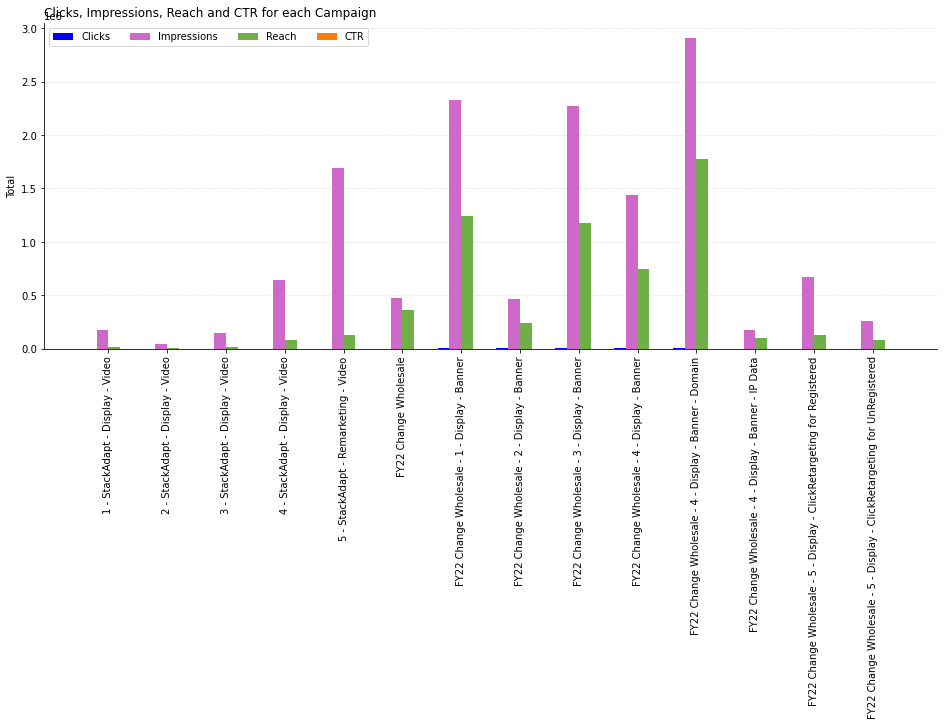

In [13]:
#Define figure
fig, ax = plt.subplots(1, figsize=(16, 6))

#Numerical x
x = np.arange(0, len(CD_grouped1.index))
# plot bars
plt.bar(x - 0.3, CD_grouped1['Clicks'], width = 0.2, color = '#0000FF')
plt.bar(x - 0.1, CD_grouped1['Impressions'], width = 0.2, color = '#CD69C9')
plt.bar(x + 0.1, CD_grouped1['Reach'], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.3, CD_grouped1['CTR'], width = 0.2, color = '#FF8000')

#Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('Total')
plt.xticks(x, CD_grouped1.index)

#Grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)

#Title and legend
plt.title('Clicks, Impressions, Reach and CTR for each Campaign', loc ='left')
plt.legend(['Clicks', 'Impressions', 'Reach', 'CTR'], loc='upper left', ncol = 4)
plt.xticks(rotation=90)
plt.show()

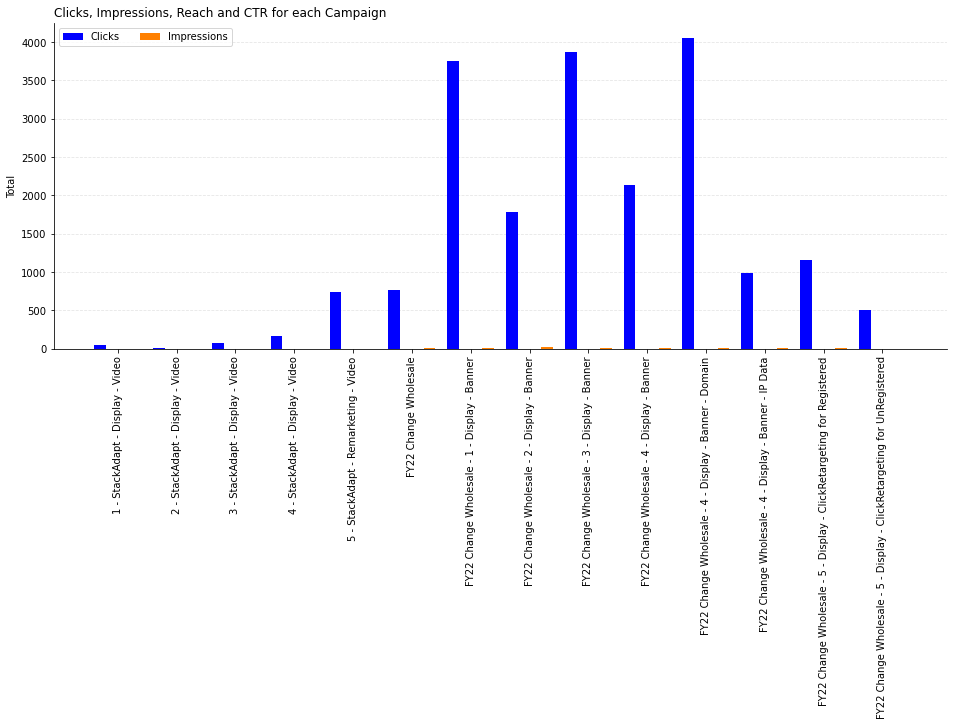

In [14]:
#Define figure
fig, ax = plt.subplots(1, figsize=(16, 6))

#Numerical x
x = np.arange(0, len(CD_grouped1.index))
# plot bars
plt.bar(x - 0.3, CD_grouped1['Clicks'], width = 0.2, color = '#0000FF')
plt.bar(x + 0.3, CD_grouped1['CTR'], width = 0.2, color = '#FF8000')

#Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('Total')
plt.xticks(x, CD_grouped1.index)


#Grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)

#Title and legend
plt.title('Clicks, Impressions, Reach and CTR for each Campaign', loc ='left')
plt.legend(['Clicks', 'Impressions', 'Reach', 'CTR'], loc='upper left', ncol = 4)
plt.xticks(rotation=90)
plt.show()

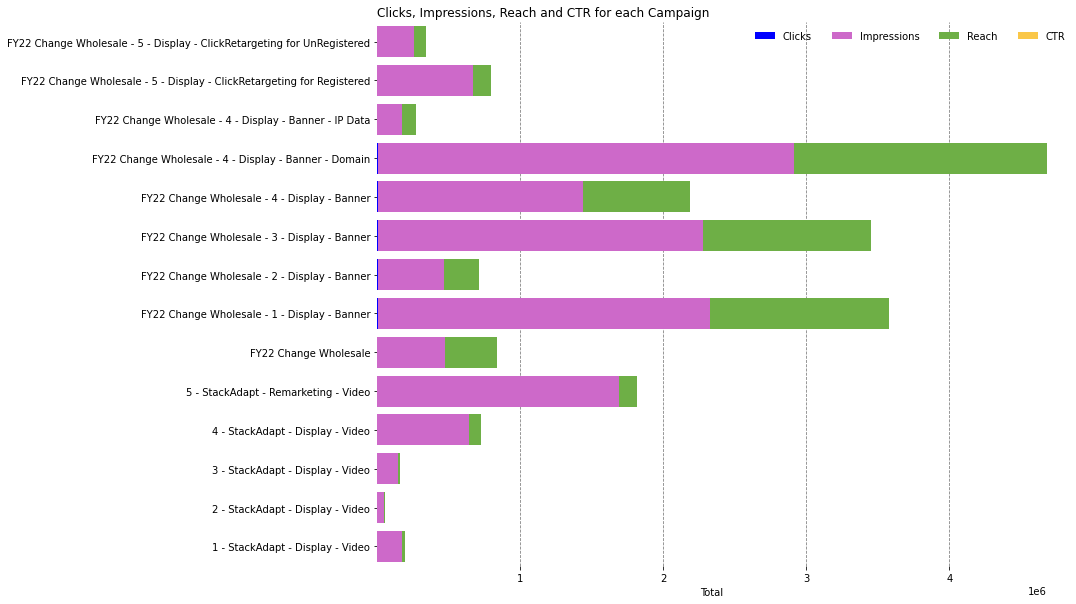

In [15]:
fields = ['Clicks', 'Impressions', 'Reach', 'CTR']
colors = ['#0000FF', '#CD69C9', '#6EAF46', '#FAC748']
labels = ['Clicks', 'Impressions', 'Reach', 'CTR']

#Figure and axis
fig, ax = plt.subplots(1, figsize=(12, 10))

#Plot bars
left = len(CD_grouped1) * [0]
for idx, name in enumerate(fields):
    plt.barh(CD_grouped1.index, CD_grouped1[name], left = left, color=colors[idx])
    left = left + CD_grouped1[name]
    
#Title, legend, labels
plt.title('Clicks, Impressions, Reach and CTR for each Campaign', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Total')

#Remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

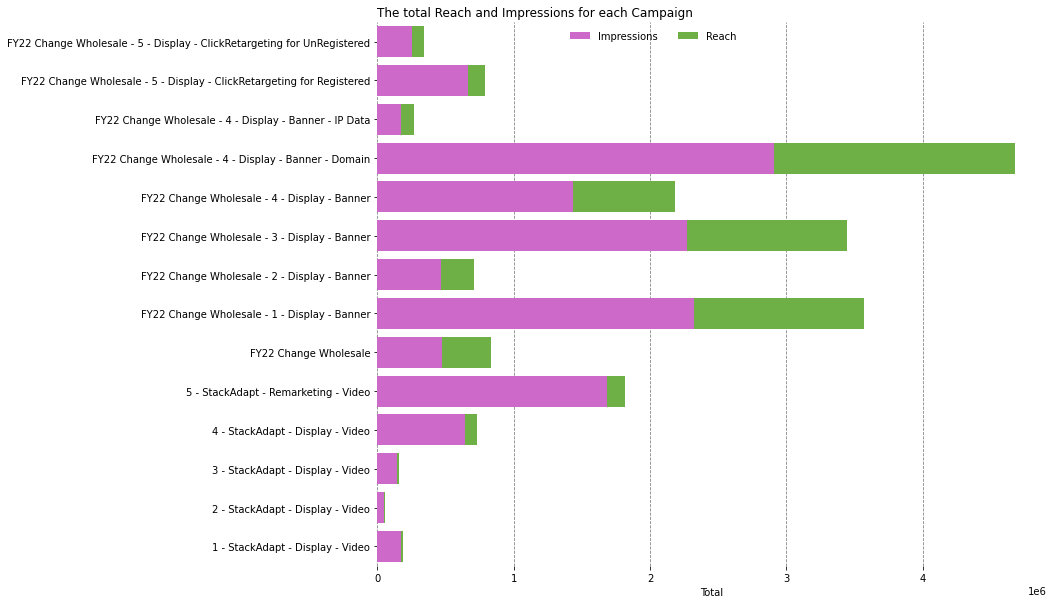

In [18]:
fields = ['Impressions', 'Reach']
colors = ['#CD69C9', '#6EAF46']
labels = ['Impressions', 'Reach']

#Figure and axis
fig, ax = plt.subplots(1, figsize=(12, 10))

#Plot bars
left = len(CD_grouped1) * [0]
for idx, name in enumerate(fields):
    plt.barh(CD_grouped1.index, CD_grouped1[name], left = left, color=colors[idx])
    left = left + CD_grouped1[name]
    
#Title, legend, labels
plt.title('The total Reach and Impressions for each Campaign', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Total')

#Remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

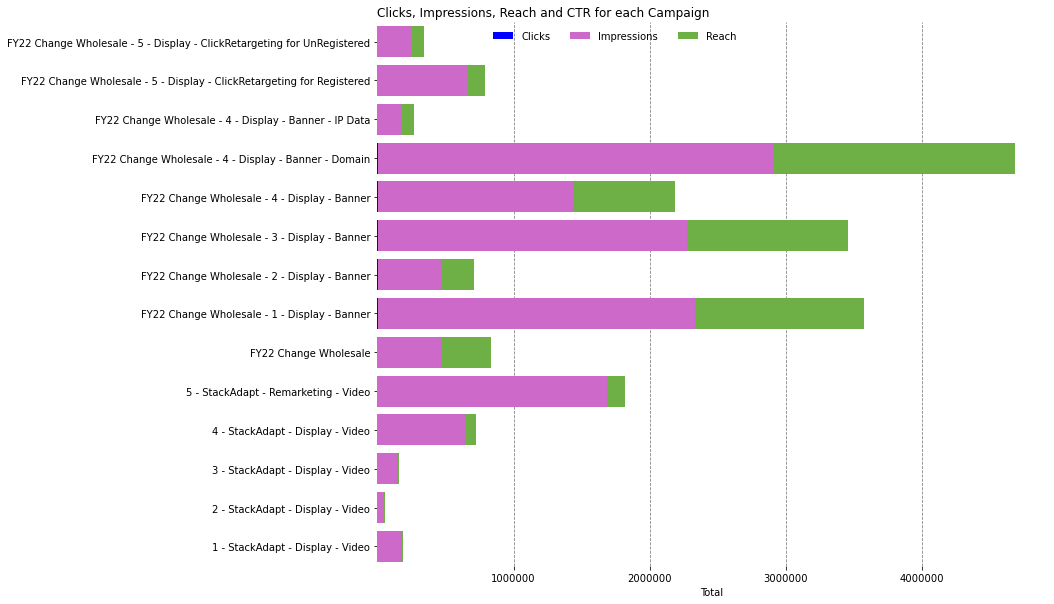

In [17]:
fields = ['Clicks', 'Impressions', 'Reach']
colors = ['#0000FF', '#CD69C9', '#6EAF46']
labels = ['Clicks', 'Impressions', 'Reach']

#Figure and axis
fig, ax = plt.subplots(1, figsize=(12, 10))

#Plot bars
left = len(CD_grouped1) * [0]
for idx, name in enumerate(fields):
    plt.barh(CD_grouped1.index, CD_grouped1[name], left = left, color=colors[idx])
    left = left + CD_grouped1[name]
    
#Title, legend, labels
plt.title('Clicks, Impressions, Reach and CTR for each Campaign', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Total')

#Remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

### Ad Format

In [21]:
#Groupby for each Campaign 
CD_grouped2 = CD_new2.groupby('Ad Format').sum()[['Clicks','Impressions','Reach', 'CTR']]

In [22]:
#View output
CD_grouped2

,Clicks,Impressions,Reach,CTR
Ad Format,,,,
Display,19007.0,10976001.0,5850493.0,68.527124
Video,1033.0,2697974.0,245468.0,1.048600


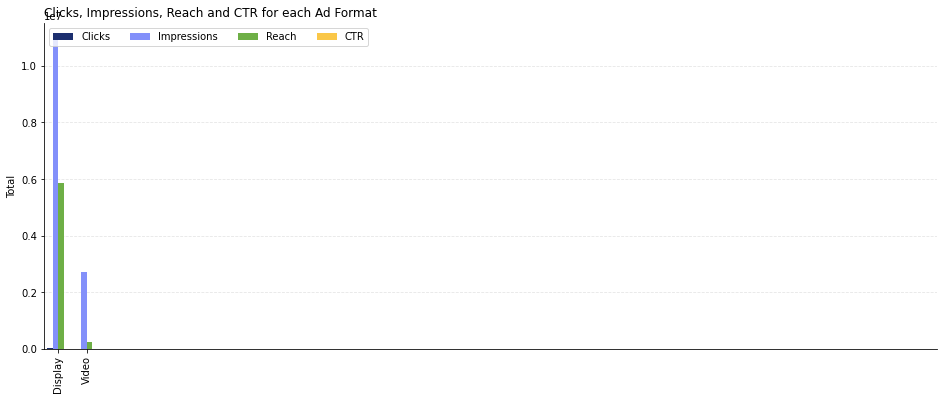

In [24]:
#Define figure
fig, ax = plt.subplots(1, figsize=(16, 6))

#Numerical x
x = np.arange(0, len(CD_grouped2.index))
# plot bars
plt.bar(x - 0.3, CD_grouped2['Clicks'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, CD_grouped2['Impressions'], width = 0.2, color = '#8390FA')
plt.bar(x + 0.1, CD_grouped2['Reach'], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.3, CD_grouped2['CTR'], width = 0.2, color = '#FAC748')

#Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('Total')
plt.xticks(x, CD_grouped2.index)
plt.xlim(-0.5, 31)

#Grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)

#Title and legend
plt.title('Clicks, Impressions, Reach and CTR for each Ad Format', loc ='left')
plt.legend(['Clicks', 'Impressions', 'Reach', 'CTR'], loc='upper left', ncol = 4)
plt.xticks(rotation=90)
plt.show()

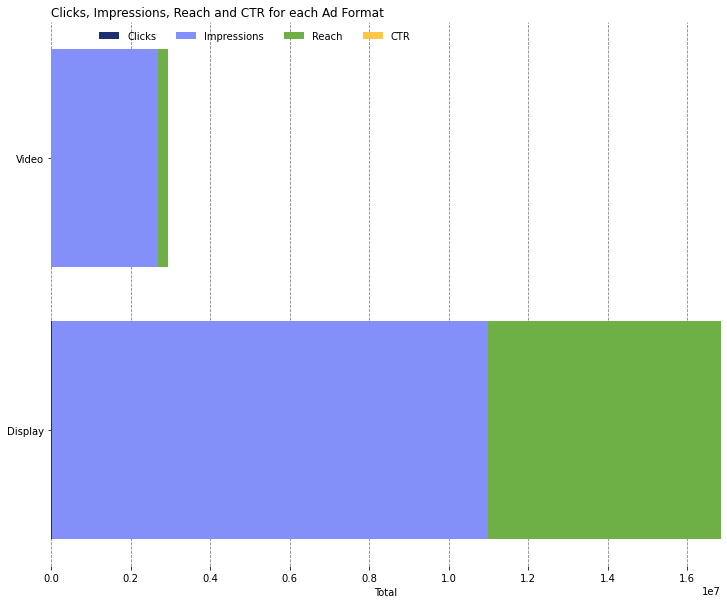

In [25]:
fields = ['Clicks', 'Impressions', 'Reach', 'CTR']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
labels = ['Clicks', 'Impressions', 'Reach', 'CTR']

#Figure and axis
fig, ax = plt.subplots(1, figsize=(12, 10))

#Plot bars
left = len(CD_grouped2) * [0]
for idx, name in enumerate(fields):
    plt.barh(CD_grouped2.index, CD_grouped2[name], left = left, color=colors[idx])
    left = left + CD_grouped2[name]
    
#Title, legend, labels
plt.title('Clicks, Impressions, Reach and CTR for each Ad Format', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Total')

#Remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

Campaign Audience and Platform

In [ ]:
#Groupby for each Campaign 
CD_grouped3 = CD_new2.groupby('Campaign').sum()[['Audience','Platform']]

In [ ]:
fields = ['Platform', 'Impressions', 'Reach']
colors = ['#0000FF', '#CD69C9', '#6EAF46']
labels = ['Clicks', 'Impressions', 'Reach']

#Figure and axis
fig, ax = plt.subplots(1, figsize=(12, 10))

#Plot bars
left = len(CD_grouped1) * [0]
for idx, name in enumerate(fields):
    plt.barh(CD_grouped1.index, CD_grouped1[name], left = left, color=colors[idx])
    left = left + CD_grouped1[name]
    
#Title, legend, labels
plt.title('Clicks, Impressions, Reach and CTR for each Campaign', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Total')

#Remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()